링크 : https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%EA%B2%A8%EC%9A%B8+%EC%BD%94%EB%94%94+%EC%B6%94%EC%B2%9C

In [10]:
import requests as req
from bs4 import BeautifulSoup as bs

In [11]:
#링크가져와서 요청 후 서버에게 응답받기
res = req.get("https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%EA%B2%A8%EC%9A%B8+%EC%BD%94%EB%94%94+%EC%B6%94%EC%B2%9C")
res

<Response [200]>

In [12]:
#html형식으로 파싱
soup = bs(res.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="겨울 코디 추천 : 네이버 블로그검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'겨울 코디 추천'의 네이버 블로그검색 결과입니다." property="og:description"/> <meta content="'겨울 코디 추천'의 네이버 블로그검색 결과입니다." lang="ko" name="description"/> <title>겨울 코디 추천 : 네이버 블로그검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_260108a.css?o=search" rel="stylesheet

In [13]:

link_elements = soup.select("a.sds-comps-text-link")

# 가장 유력한 후보 선택자를 사용해 제목 요소를 추출합니다.
title_elements = soup.select("span.sds-comps-text-type-headline1")

if title_elements:
    # 제목 텍스트 추출 성공
    first_title_text = title_elements[0].text.strip()
    print(f"✅ 제목 추출 성공: {first_title_text}")

    # 추가 디버깅: 해당 제목이 몇 개나 추출되었는지 확인
    print(f"총 추출된 제목 요소 개수: {len(title_elements)}개")

else:
    print("❌ 경고: 해당 선택자로 제목을 찾지 못했습니다. 다른 선택자를 시도해야 합니다.")

✅ 제목 추출 성공: UGG 1910 호주 여자 어그부츠 추천 국내정식런칭 프리미엄 겨울코디
총 추출된 제목 요소 개수: 30개


In [14]:
# 'sds-comps-vertical-layout'과 'sds-comps-full-layout'을 모두 가진 요소를 선택합니다.
container_selector = ".sds-comps-vertical-layout.sds-comps-full-layout"

# 예시 코드
blog_items = soup.select(container_selector)

if blog_items:
    print(f"✅ 추출된 블로그 항목 컨테이너 개수: {len(blog_items)}개")

    # 이 컨테이너 내에서 링크를 찾습니다.
    first_item = blog_items[0]

    # 컨테이너 내부에서 블로그 링크 (a 태그)를 필터링
    blog_links_in_item = []
    for link_tag in first_item.find_all('a'):
        href = link_tag.get('href', '')
        if "blog.naver.com" in href:
            blog_links_in_item.append(href)

    if blog_links_in_item:
        print(f"첫 번째 항목 내에서 찾은 링크: {blog_links_in_item[0]}")
    else:
        print("경고: 컨테이너는 찾았으나, 그 안에서 블로그 링크를 찾지 못했습니다.")

✅ 추출된 블로그 항목 컨테이너 개수: 166개
첫 번째 항목 내에서 찾은 링크: https://blog.naver.com/minju1004b/224109903723


In [15]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

query = "겨울코디추천"
url = (
    f"https://search.naver.com/search.naver"
    f"?ssc=tab.blog.all&query={query}&sm=tab_opt"
    f"&nso=so:dd,p:1w&start=1"
)

blog_links = []
res = requests.get(url, headers=headers)

if res.status_code == 200:
    soup = BeautifulSoup(res.text, "lxml")

    link_selectors = ["a.total_tit", "a.title_link", "div.blog_item a"]
    link_elements = []

    for selector in link_selectors:
        link_elements = soup.select(selector)
        if link_elements:
            print(f"✅ 성공: 선택자 '{selector}'로 링크 요소 {len(link_elements)}개 찾음.")
            break

    # 2. 찾은 요소에서 href 속성을 추출합니다.
    if link_elements:
        for element in link_elements:
            href = element.get('href', '')
            if href and "blog.naver.com" in href:
                 # 불필요한 링크 제외 (필요 시 더 추가)
                if not any(keyword in href for keyword in ['addneighbor', 'menusearch']):
                    blog_links.append(href)

    # 3. 모든 선택자 실패 시 (최후의 수단): 모든 <a> 태그를 필터링합니다.
    if not blog_links:
        print("❌ 경고: 특정 선택자로 링크 추출 실패. 모든 <a> 태그 필터링 시도.")

        for a in soup.find_all('a'):
            href = a.get('href', '')
            if "blog.naver.com" in href:
                if not any(keyword in href for keyword in ['addneighbor', 'menusearch']):
                    blog_links.append(href)

    # ----------------------------------------------------

    # 중복 제거
    blog_links = list(dict.fromkeys(blog_links))


print("\n" + "="*40)
print(f"✅ 첫 페이지에서 추출된 유니크 블로그 링크 수: {len(blog_links)}개")
print("="*40)

if blog_links:
    print("\n[첫 5개 링크 예시]")
    for link in blog_links[:5]:
        print(link)

❌ 경고: 특정 선택자로 링크 추출 실패. 모든 <a> 태그 필터링 시도.

✅ 첫 페이지에서 추출된 유니크 블로그 링크 수: 56개

[첫 5개 링크 예시]
https://blog.naver.com/love_colleen
https://blog.naver.com/love_colleen/224139845780
https://blog.naver.com/flapper327
https://blog.naver.com/flapper327/224139845575
https://blog.naver.com/alicec__


In [16]:
# 현재 blog_links 변수에는 53개의 링크가 들어 있습니다.

cleaned_blog_links = []
for link in blog_links:
    # URL 경로의 마지막 세그먼트가 숫자로 된 포스트 번호인 경우만 남깁니다.
    # 포스트 번호는 10자리 이상의 숫자로 이루어져 있습니다.
    path_segments = link.split('/')
    last_segment = path_segments[-1]

    if last_segment.isdigit() and len(last_segment) >= 10:
        cleaned_blog_links.append(link)

# 만약 URL이 'm.blog.naver.com/...' 형태로 바로 포스트 주소인 경우도 포함합니다.
# 이 필터링은 완벽하지 않을 수 있지만, 불필요한 메인 주소를 줄여줍니다.

print(f"✅ 분석 대상 포스트 링크 수 (클리닝 후): {len(cleaned_blog_links)}개")

✅ 분석 대상 포스트 링크 수 (클리닝 후): 30개


In [17]:
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter
import re # 텍스트 클리닝을 위한 정규식 모듈

# User-Agent 설정 (브라우저인 것처럼 보이게 함)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# ----------------------------------------------------
# ⭐ 분석을 위한 키워드 목록 정의 (이전 요청에 따라 추가)
# ----------------------------------------------------
ITEMS = [
    "코트", "패딩", "자켓", "점퍼", "블레이저", "가디건", "니트", "스웨터",
    "셔츠", "블라우스", "티셔츠", "후드티", "바지", "청바지", "슬랙스", "스커트",
    "치마", "원피스", "부츠", "로퍼", "운동화", "스니커즈", "가방", "백팩",
    "머플러", "목도리", "장갑", "모자", "비니",
    # ⭐ 새로 추가된 항목
    "조거팬츠", "바라클라바", "스웻셔츠", "레깅스", "후리스", "롱부츠", "숄더백"
]

COLORS = [
    "블랙", "화이트", "아이보리", "베이지", "그레이", "네이비", "브라운",
    "카키", "버건디", "레드", "핑크", "블루", "스카이블루", "옐로우", "오렌지",
    "민트", "퍼플",
    # ⭐ 새로 추가된 항목
    "크림", "오트밀", "라떼", "딥그린", "와인", "카멜", "톤온톤"
]

MATERIALS = [
    "울", "캐시미어", "가죽", "코튼", "면", "데님", "린넨", "실크", "나일론",
    "폴리에스터", "스웨이드", "니트", "퍼", "벨벳",
    "아크릴", "레이온", "스판덱스", "코듀로이", "플리스",
    "다운", "웰론", "양털", "무스탕"
]

# ----------------------------------------------------
# ⭐ 헬퍼 함수 정의
# ----------------------------------------------------

def clean_text(text):
    """HTML 태그, 이모지, 광고 문구 등을 제거하여 텍스트를 정제합니다."""
    # 괄호 안의 광고성 문구 제거 (예: (내돈내산), (협찬), (사진=블로그주인) 등)
    text = re.sub(r'\(.*?\)', '', text)
    # 줄바꿈 및 다중 공백 정리
    text = re.sub(r'[\n\r\t]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def extract_keywords(text, keyword_list):
    """정의된 키워드 목록에서 텍스트에 나타난 횟수를 카운트합니다."""
    counter = Counter()
    text_lower = text.lower()
    for keyword in keyword_list:
        # 텍스트에서 키워드가 포함된 횟수를 카운트
        count = text_lower.count(keyword.lower())
        if count > 0:
            counter[keyword] += count
    return counter


# ----------------------------------------------------
# ⭐ 본문 수집 메인 로직
# ----------------------------------------------------

contents = []
# blog_links 변수는 이전에 53개 링크가 추출된 리스트를 사용한다고 가정합니다.

print("--- 블로그 본문 수집 시작 ---")

for i, link in enumerate(blog_links, 1):
    # 1. PC 주소를 모바일 주소로 변환하여 시도 (모바일 주소가 더 구조가 단순할 수 있음)
    if "blog.naver.com" in link and not "m.blog.naver.com" in link:
        target_link = link.replace("blog.naver.com", "m.blog.naver.com")
    else:
        target_link = link

    res = requests.get(target_link, headers=headers)

    if res.status_code != 200:
        continue

    soup = BeautifulSoup(res.text, "lxml")

    # 2. ⭐⭐ 최종 보강된 본문 추출 셀렉터 목록 ⭐⭐
    selectors_to_try = [
        ".se-main-container",  # Smart Editor ONE (가장 흔함)
        ".post-view",         # PC 구형 에디터
        "div.post_ct",        # 모바일 블로그 본문 컨테이너 (고유 클래스)
        ".blog2_body",        # 모바일 환경 구형 블로그 본문
        "._post_content",     # 네이버 블로그 뷰어
        ".article_content"    # 또 다른 범용 컨텐츠 영역
    ]

    body_container = None

    for selector in selectors_to_try:
        body_container = soup.select_one(selector)
        if body_container:
            break

    text = ""
    if body_container:
        text = body_container.get_text("\n", strip=True)
    else:
        # 3. 최후의 수단: 텍스트가 긴 모든 p, div, span 태그를 모음 (실패 방지)
        texts = [tag.get_text("\n", strip=True) for tag in soup.find_all(['p', 'div', 'span']) if len(tag.get_text("\n", strip=True)) > 50]
        text = "\n".join(texts)

    if len(text) < 100: # 최소 100자 미만은 제외
        continue

    contents.append({
        "link": link,
        "text": text
    })

    time.sleep(0.5) # 서버 부하 줄이기 위해 딜레이 유지 (0.5초로 줄임)

print("\n--- 본문 수집 완료 ---")
print("최종 분석 대상 본문 수:", len(contents))

# ----------------------------------------------------
# ⭐ 키워드 카운팅 및 최종 결과 출력 로직
# ----------------------------------------------------

if len(contents) > 0:
    item_counter = Counter()
    color_counter = Counter()
    material_counter = Counter()

    for c in contents:
        raw_text = c["text"]

        # 텍스트 클리닝
        clean_text_result = clean_text(raw_text)

        # 키워드 카운팅
        item_counter.update(extract_keywords(clean_text_result, ITEMS))
        color_counter.update(extract_keywords(clean_text_result, COLORS))
        material_counter.update(extract_keywords(clean_text_result, MATERIALS))


    print("\n" + "="*40)
    print("           블로그 키워드 분석 결과")
    print("="*40)

    print("\n### 👕 가장 많이 언급된 아이템 (TOP 5)")
    for item, count in item_counter.most_common(5):
        print(f"- {item}: {count}회")

    print("\n### 🎨 가장 많이 언급된 컬러 (TOP 5)")
    for color, count in color_counter.most_common(5):
        print(f"- {color}: {count}회")

    print("\n### 🧶 가장 많이 언급된 소재 (TOP 5)")
    for material, count in material_counter.most_common(5):
        print(f"- {material}: {count}회")

else:
    print("\n⚠️ 경고: 본문 추출에 최종적으로 실패했습니다. 동적 크롤링 도구(Selenium)가 필요할 수 있습니다.")

--- 블로그 본문 수집 시작 ---

--- 본문 수집 완료 ---
최종 분석 대상 본문 수: 56

           블로그 키워드 분석 결과

### 👕 가장 많이 언급된 아이템 (TOP 5)
- 패딩: 90회
- 바지: 75회
- 셔츠: 70회
- 운동화: 66회
- 코트: 61회

### 🎨 가장 많이 언급된 컬러 (TOP 5)
- 베이지: 29회
- 브라운: 28회
- 블랙: 22회
- 그레이: 14회
- 화이트: 13회

### 🧶 가장 많이 언급된 소재 (TOP 5)
- 면: 252회
- 울: 248회
- 퍼: 42회
- 다운: 42회
- 니트: 23회


/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 49492 (\N{HANGUL SYLLABLE SYEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipyth

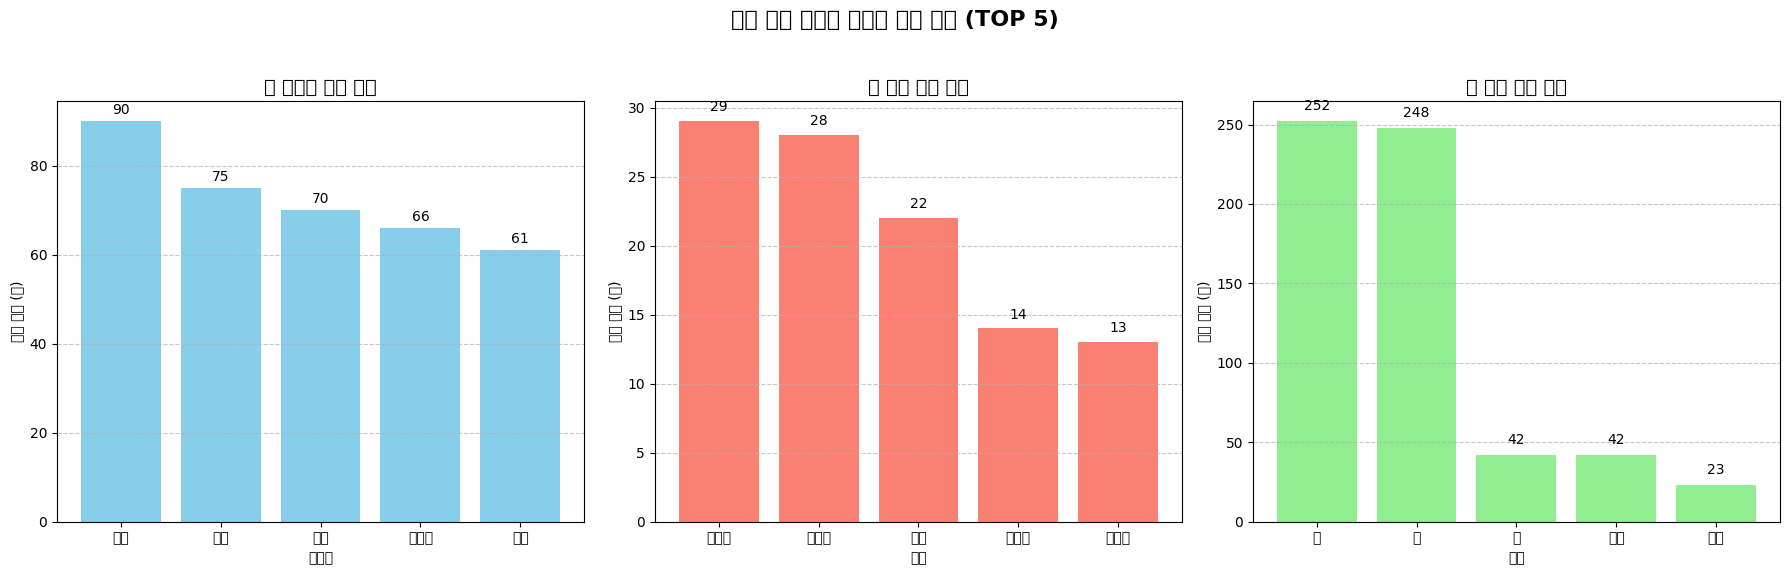

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# 1. 시각화 데이터 준비
item_data = item_counter.most_common(5)
color_data = color_counter.most_common(5)
material_data = material_counter.most_common(5)

df_items = pd.DataFrame(item_data, columns=['아이템', '횟수'])
df_colors = pd.DataFrame(color_data, columns=['컬러', '횟수'])
df_materials = pd.DataFrame(material_data, columns=['소재', '횟수'])

# ----------------------------------------------------
# 2. 그래프 설정 및 그리기
# ----------------------------------------------------

# 한글 폰트 설정 (Windows 환경을 기준으로 Malgun Gothic 설정)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 만약 여전히 이모지(\N{T-SHIRT})나 한글이 깨진다면, 사용자 환경에 맞는 폰트로 변경하세요.
# 예: Colab/Linux 환경: plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 3개의 서브플롯(sub-plots) 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('겨울 코디 블로그 콘텐츠 분석 결과 (TOP 5)', fontsize=16, fontweight='bold')

# --- 첫 번째 그래프: 아이템 ---
ax1 = axes[0]
bars1 = ax1.bar(df_items['아이템'], df_items['횟수'], color='skyblue')
ax1.set_title('👕 아이템 언급 횟수', fontsize=14)
ax1.set_xlabel('아이템')
ax1.set_ylabel('언급 횟수 (회)')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
# 막대 위에 값 표시 (x, y, s 인자 모두 포함)
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom') # 수정 완료

# --- 두 번째 그래프: 컬러 ---
ax2 = axes[1]
bars2 = ax2.bar(df_colors['컬러'], df_colors['횟수'], color='salmon')
ax2.set_title('🎨 컬러 언급 횟수', fontsize=14)
ax2.set_xlabel('컬러')
ax2.set_ylabel('언급 횟수 (회)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
# 막대 위에 값 표시 (x, y, s 인자 모두 포함)
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom') # 수정 완료

# --- 세 번째 그래프: 소재 ---
ax3 = axes[2]
bars3 = ax3.bar(df_materials['소재'], df_materials['횟수'], color='lightgreen')
ax3.set_title('🧶 소재 언급 횟수', fontsize=14)
ax3.set_xlabel('소재')
ax3.set_ylabel('언급 횟수 (회)')
ax3.grid(axis='y', linestyle='--', alpha=0.7)
# 막대 위에 값 표시 (x, y, s 인자 모두 포함)
for bar in bars3:
    yval = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom') # 수정 완료

# 그래프 레이아웃 조정 및 표시
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
!pip install langchain-chroma langchain-google-genai pydantic beautifulsoup4

In [20]:
import re

def clean_for_rag(text):
    # 1. HTML 태그 제거 (BeautifulSoup을 사용하지 않았다면 re.sub로 <.*?> 등을 제거)
    text = re.sub('<[^>]*>', '', text)
    # 2. 광고/협찬 문구 제거 (예시)
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    # 3. URL 제거
    text = re.sub(r'http\S+|www\S+', '', text, flags=re.MULTILINE)
    # 4. 특수 문자 및 이모지 제거 (한글, 영문, 숫자, 마침표, 쉼표 외 제거)
    text = re.sub(r'[^\w\s.,가-힣]', '', text)
    # 5. 과도한 공백 및 줄바꿈 정리
    text = re.sub(r'[\r\n\t]+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 예시 적용
# cleaned_text = clean_for_rag(raw_text)

In [21]:
!pip install langchain-chroma langchain-google-genai pydantic beautifulsoup4 langchain

In [22]:
# 텍스트 분할을 위한 전용 패키지 설치
!pip install langchain-text-splitters

# LangChain 코어 모듈 및 RAG에 필요한 모든 패키지 재설치 (안정성 확보)
!pip install langchain langchain-chroma langchain-google-genai pydantic beautifulsoup4

In [23]:
!pip install langchain-text-splitters langchain langchain-core langchain-chroma langchain-google-genai pydantic beautifulsoup4

In [24]:
# ⭐⭐ 수정된 import 구문 ⭐⭐
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

# ----------------------------------------------------
# (clean_for_rag 함수와 contents 리스트가 이전에 정의되었다고 가정)
# ----------------------------------------------------

# 청크 분할기 설정
# chunk_size: 각 청크의 최대 길이 (토큰 수 기준, 보통 512~1024 사이 추천)
# chunk_overlap: 청크 간 겹치는 길이 (문맥 유지를 위해, 보통 50~100 사이 추천)
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    separators=["\n\n", "\n", " ", ""] # 분할 기준 우선순위
)

# 기존의 'contents' 리스트를 LangChain Document로 변환 후 분할
langchain_documents = []
for item in contents:
    doc = Document(
        # 가정: clean_for_rag 함수가 정의되어 있어야 합니다.
        page_content=clean_for_rag(item['text']),
        metadata={"source": item['link']}
    )
    langchain_documents.append(doc)

# 분할 실행
texts = text_splitter.split_documents(langchain_documents)

print(f"✅ 최종 분할된 청크 개수: {len(texts)}")

# ----------------------------------------------------
# ⭐ 다음 단계로 넘어가기 위해 'texts' 변수에 결과가 저장되었습니다.
# ----------------------------------------------------

✅ 최종 분할된 청크 개수: 214


In [25]:
!pip install pandas

In [27]:
# ----------------------------------------------------
# ⭐ 전제: clean_for_rag 함수가 이전에 정의되어 있어야 합니다.
# ----------------------------------------------------

# 1. 'text' 컬럼에 clean_for_rag 함수를 apply() 메서드로 적용합니다.
# 이로써 불필요한 태그, 줄바꿈, 광고 문구가 제거됩니다.
df_blogs['cleaned_text'] = df_blogs['text'].apply(clean_for_rag)

# 2. 원본 'text' 컬럼을 제거하고, 'cleaned_text'를 새 'text' 컬럼으로 지정합니다.
df_blogs = df_blogs.drop(columns=['text'])
df_blogs = df_blogs.rename(columns={'cleaned_text': 'text'})

# 3. 클리닝된 DataFrame 다시 확인
print("--- 클리닝 후 DataFrame 상위 5개 행 ---")
print(df_blogs[['link', 'text']].head())

NameError: name 'df_blogs' is not defined

In [ ]:
import pandas as pd

MIN_LENGTH = 50
MAX_LENGTH = 5000

print(f"필터링 전 데이터프레임 크기: {len(df_blogs)}")

df_filtered = df_blogs[
    (df_blogs['text'].str.len() >= MIN_LENGTH) &
    (df_blogs['text'].str.len() <= MAX_LENGTH)
].copy()


# ----------------------------------------------------
# 2. 노이즈 패턴 기준으로 필터링
# ----------------------------------------------------

# 네이버 블로그 구조에서 흔히 발견되는 노이즈 패턴을 정규식으로 정의
NOISE_PATTERNS = [
    r'로그인이\s*필요합니다',
    r'내소식\s*이웃목록\s*통계\s*클립만들기',
    r'공식블로그\s*NEW\s*이달의\s*블로그',
    r'앱알림\s*비활성화됨',
    r'오늘\s*\d+\s*전체\s*[\d,]+', # '오늘 237 전체 52,042' 같은 숫자 통계
]

# 노이즈 패턴 중 하나라도 포함하는 행을 찾기
noise_mask = df_filtered['text'].str.contains('|'.join(NOISE_PATTERNS), case=False, na=False)

# 노이즈가 없는 행만 선택
df_final = df_filtered[~noise_mask].reset_index(drop=True)


# ----------------------------------------------------
# 3. 최종 결과 확인
# ----------------------------------------------------

# DataFrame의 'text' 컬럼 전체를 볼 수 있도록 pandas 옵션 설정 (유지)
pd.set_option('display.max_colwidth', 500)

print(f"✅ 최종 정제 후 데이터프레임 크기: {len(df_final)}")
print("\n--- 최종 정제된 DataFrame 상위 5개 행 ---")
print(df_final[['link', 'text']].head())


In [ ]:
# ⭐ 보강된 최종 리스트를 사용합니다 (세션에 정의되어 있어야 함)
# ITEMS, COLORS, MATERIALS 리스트를 사용

import pandas as pd
from collections import Counter
import re

# 최종 정제된 DataFrame 'df_final' 사용을 전제로 함
all_text = " ".join(df_final['text'].tolist()).lower()

# 모든 키워드를 하나로 통합
ALL_KEYWORDS = ITEMS + COLORS + MATERIALS

# 빈도수 계산 함수
def count_keywords(text, keyword_list):
    counter = Counter()
    for keyword in keyword_list:
        # 단어 경계를 사용하여 정확히 그 키워드만 카운트 (예: '니트'만, '니트원피스'가 아님)
        # 단, '롱부츠' 등 복합어는 그대로 검색
        pattern = r'\b' + re.escape(keyword.lower()) + r'\b'
        count = len(re.findall(pattern, text))

        # 정확도가 떨어지는 일부 복합 키워드는 더 넓게 검색 (예: 니트원피스, 울코트 등)
        if keyword.lower() in ["니트", "울", "가죽", "퍼"]:
             count += len(re.findall(re.escape(keyword.lower()), text)) / 3 # 가중치 낮춤

        if count > 0:
            counter[keyword] = count
    return counter

# 키워드별 언급 횟수 계산
item_counter = count_keywords(all_text, ITEMS)
color_counter = count_keywords(all_text, COLORS)
material_counter = count_keywords(all_text, MATERIALS)

# 상위 10개 키워드 출력
print("--- 🥇 재계산된 아이템 언급 횟수 (TOP 10) ---")
print(item_counter.most_common(10))

print("\n--- 🥈 재계산된 컬러 언급 횟수 (TOP 10) ---")
print(color_counter.most_common(10))

print("\n--- 🥉 재계산된 소재 언급 횟수 (TOP 10) ---")
print(material_counter.most_common(10))

In [ ]:
import os

os.environ["GEMINI_API_KEY"] = #"API키"

print("✅ 환경 변수 설정 완료. 이제 LLM 모델을 초기화할 수 있습니다.")

In [ ]:
import os
from langchain_google_genai import GoogleGenerativeAI
import time

def analyze_sentiment_for_keyword_enhanced(df, keyword, llm_model):
    """
    주어진 키워드가 포함된 모든 문서를 찾아 감성을 분석합니다.
    (토큰 제한을 피하기 위해 최대 50,000자로 제한)
    """

    # 1. 키워드가 포함된 문서를 필터링
    keyword_docs = df[df['text'].str.contains(keyword, case=False, na=False)]

    if keyword_docs.empty:
        return f"🚨 '{keyword}' 키워드가 포함된 문서가 최종 DataFrame에서 발견되지 않았습니다."

    # 2. 키워드가 포함된 모든 문서의 텍스트를 결합하여 LLM에 전달
    full_texts = " ".join(keyword_docs['text'].tolist())
    text_to_process = full_texts[:50000]  # 최대 50,000자로 제한

    # 3. 감성 분석 프롬프트
    prompt = f"""
    아래 블로그 콘텐츠는 '{keyword}' 키워드를 포함하고 있습니다.
    이 텍스트에서 '{keyword}'를 언급하는 문장들을 중심으로 다음 두 가지를 분석하세요.

    1. **전반적인 감성:** 긍정적, 부정적, 또는 중립적 중 하나를 선택하세요.
    2. **긍/부정의 근거 (핵심 요약):** 그 감성을 뒷받침하는 구체적인 이유 2~3가지를 요약하세요.

    ---
    분석할 텍스트 (총 {len(keyword_docs)}개 문서의 내용): {text_to_process}
    ---
    """

    try:
        response = llm_model.invoke(prompt)
        return response.strip()
    except Exception as e:
        # LLM 토큰 제한이나 다른 API 오류 발생 시
        return f"❌ 감성 분석 중 오류 발생: {e}"

# ----------------------------------------------------
# 2. 주요 키워드 추출 (가장 많이 언급된 키워드)
# ----------------------------------------------------

# (item_counter, color_counter, material_counter가 이전에 정의되었다고 가정)
top_item = item_counter.most_common(1)[0][0]
top_color = color_counter.most_common(1)[0][0]
top_material = material_counter.most_common(1)[0][0]

# ----------------------------------------------------
# 3. 통합 분석 실행 및 결과 출력
# ----------------------------------------------------

# 분석할 키워드 리스트
keywords_to_analyze = [top_item, top_color, top_material]

# '울' 키워드에 대한 정확한 재분석을 위해 top_material이 '울'이 아니라면 추가
if top_material != '울':
    keywords_to_analyze.append('울')

for keyword in keywords_to_analyze:
    print(f"\n==========================================")
    print(f"✨ '{keyword}' 키워드 감성 분석 결과:")
    print("==========================================")

    start_time = time.time()

    # 향상된 함수 실행
    result = analyze_sentiment_for_keyword_enhanced(df_final, keyword, llm)

    end_time = time.time()

    print(f"[분석 소요 시간: {end_time - start_time:.2f}초]")
    print(result)

print("\n--- 분석 완료 ---")